In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats
from matplotlib import transforms, pyplot as plt
%matplotlib inline

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.linewidth'] = 0.5
GRAY4, GRAY7 = '#646369', '#929497'

In [2]:
df = pd.read_csv("~/Desktop/controlLow.csv")
ar = df.values
arT = ar.T
toBeDelete = []
for i in range(2,arT.shape[0]):
    tmp = arT[i]
    count = 0
    for j in range(arT.shape[1]):
        if tmp[j] < 1e-6:
            count = count + 1
    if count > (arT.shape[1]-2):
        print(i, count)
        toBeDelete.append(i)
df.drop(df.columns[toBeDelete], axis=1, inplace=True)

2 46
24 45
25 45
45 45
65 45
68 46
69 46
70 45
73 45
75 46


In [3]:
df['Risk'] = pd.get_dummies(df['Risk'])['Control']
features = df.columns.values.tolist()
features.remove('Risk')
features.remove('Sample Name')
target = 'Risk'
df[features + [target]]

,GSSG,8-OH-dG,GSH,L-Leucine,L-Kynurenine,L-Tryptophan,5-HTP,Cholic acid,N-phenylacetylglycine,5-HT,...,Glycine49,PE(36:4),glutamine,betaine,histidine,serine-1,pyroglutamic acid,N6-acetyl lysine,nicotinamide,Risk
0,0.00000,1.4100,0.00933,321.0,1.480,14.20,0.04980,0.00000,0.1800,0.983,...,0.23200,2.98,0.00000,91.4,0.0266,0.00000,0.00,40.7,0.00000,1
1,0.00000,1.5900,0.00714,397.0,1.210,13.20,0.02430,0.00636,0.1750,0.723,...,0.01790,3.31,0.04290,109.0,0.0751,0.00000,0.00,13.4,0.00000,1
2,0.00000,2.0800,0.00810,617.0,1.890,14.60,0.03160,0.01100,0.6010,0.629,...,0.00000,3.57,0.03240,65.0,0.1860,0.00000,0.00,19.3,0.04880,1
3,0.00000,1.3700,0.01260,426.0,1.410,12.10,0.05200,0.00888,0.3120,1.250,...,0.00000,3.92,0.02840,75.6,0.1320,0.00000,0.00,16.8,0.00669,1
4,0.00000,0.8250,0.00658,588.0,2.490,23.20,0.05410,0.04940,0.1650,1.470,...,0.03720,4.06,0.00000,134.0,0.0986,0.00000,0.00,20.0,0.01730,1
5,0.00746,0.4280,0.00746,451.0,1.900,15.90,0.06720,0.00997,0.3070,1.070,...,0.00746,4.00,0.02610,75.8,0.0895,0.00000,0.00,16.6,0.00000,1
6,0.00000,1.1500,0.01720,334.0,1.240,15.60,0.08580,0.01330,0.3000,0.827,...,0.04120,3.75,0.00000,78.4,0.0786,0.00000,0.00,19.1,0.00000,1
7,0.00000,0.6580,0.02430,399.0,0.975,12.70,0.04760,0.00899,0.9330,0.600,...,0.01390,2.80,0.03470,73.4,0.0866,0.00000,0.00,16.4,0.02900,1
8,0.00000,2.0900,0.01370,476.0,1.400,11.00,0.02390,0.01980,0.1560,0.450,...,0.00000,3.96,0.03760,65.7,0.1070,0.00000,0.00,16.2,0.00000,1
9,0.00000,0.8100,0.00848,313.0,1.300,13.00,0.04360,0.00628,0.1770,0.454,...,0.00000,3.06,0.03490,59.5,0.0822,0.00000,0.00,12.9,0.02380,1


In [4]:
# features.remove('L-Tryptophan')
# features.remove('Hippuric acid')
# features.remove('Glutamic')

In [5]:
X, y = df[features].values, df[target].values

In [6]:
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(df[features], df[[target]], test_size=0.2, stratify=df[[target]])

# print ("number of training samples: ", len(X_train))
# print ("number of test samples: ", len(y_test))

In [7]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=5000, 
                               random_state=507, 
                               max_features = 'sqrt',
                               )

model.fit(X, y.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5000,
                       n_jobs=None, oob_score=False, random_state=507,
                       verbose=0, warm_start=False)

In [8]:
n_nodes = []
max_depths = []

for ind_tree in model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {(np.mean(n_nodes))}')
print(f'Average maximum depth {(np.mean(max_depths))}')

Average number of nodes 8.356
Average maximum depth 2.8834


In [9]:
fi = pd.DataFrame({'feature': features,
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)


In [10]:
fi.head(60)

,feature,importance
17,Hippuric acid,0.158079
1,8-OH-dG,0.099263
38,C18:1LPC,0.097617
4,L-Kynurenine,0.074402
28,Acetylcarnitine,0.063188
24,Cl-Tyr,0.027973
43,Taurine,0.027783
30,Glutamic,0.025583
14,L-Valine,0.025225
46,Inosine,0.022660


In [11]:
fi.head(60)

,feature,importance
17,Hippuric acid,0.158079
1,8-OH-dG,0.099263
38,C18:1LPC,0.097617
4,L-Kynurenine,0.074402
28,Acetylcarnitine,0.063188
24,Cl-Tyr,0.027973
43,Taurine,0.027783
30,Glutamic,0.025583
14,L-Valine,0.025225
46,Inosine,0.022660


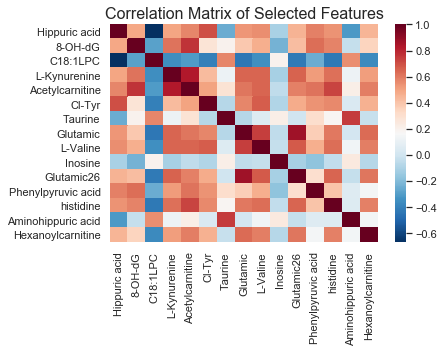

In [12]:
selected = fi.head(15)
corr_numeric = df[selected.values.T[0]].corr()
sns.set(font_scale=1)
sns.heatmap(corr_numeric, cbar=True, cmap="RdBu_r")
plt.title("Correlation Matrix of Selected Features", fontsize=16,)

plt.show() 

In [13]:
sum(fi.values.T[1])

0.9999999999999998

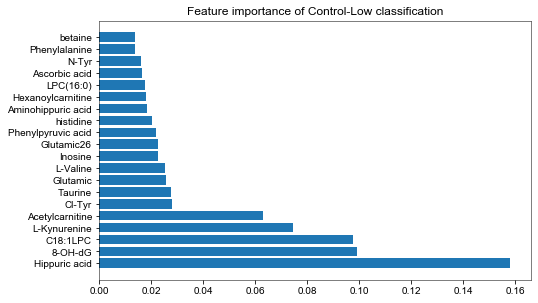

In [10]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))
    plt.figure(figsize=(8, 4.5))
    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.title('Feature importance of Control-Low classification')
    plt.subplots_adjust(left=0.2, bottom=0.1, right=0.95, top=0.9, wspace=0, hspace=0)
    plt.yticks(range(top), names[::-1][0:top], fontsize=10)
    plt.savefig("ControlLowImportance.pdf")
    plt.show()
f_importances(fi.values.T[1], fi.values.T[0], 20)

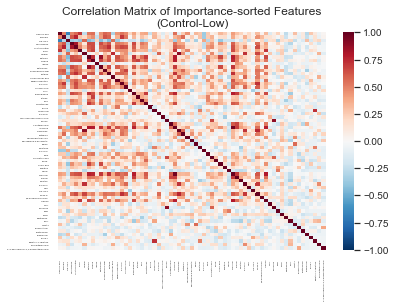

In [11]:


corr_numeric = df[fi.values.T[0]].corr()
sns.set(font_scale=0.2)
ax = sns.heatmap(corr_numeric, cbar=True, cmap="RdBu_r", vmin=-1, vmax=1)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
plt.title("Correlation Matrix of Importance-sorted Features\n(Control-Low)", fontsize=12)

plt.savefig("CorrMatCL.pdf")
plt.show() 